# RF wrapper using Mlxtend is in the 2nd section

## Section 1: Performing KS and FDR

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs ####MLXTEND LIBRARY
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
model = pd.read_csv('FinalCleanedVariablesNoNa.csv') #reading the Expert variables file with all the NA values removed

In [4]:
date = pd.read_csv("ApplicationsFrivLRemo.csv") #reading the Applications Data with all the frivolous values replaced

In [57]:
date.head()

,Unnamed: 0,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0
1,1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0
3,3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [5]:
date_new = date.loc[date['date'] < 20161101,:]

In [59]:
date_new.tail()

,Unnamed: 0,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
833502,833502,833503,20161031,614489026,EJUJRSUMZ,EEJSTZUT,9034 UERXU RD,4529,20130609,3743139222,0
833503,833503,833504,20161031,20529638,RZRTEJXUT,UXMSSZSX,1452 RJMMA ST,68562,19550212,7155993451,0
833504,833504,833505,20161031,604655517,UTEXRMERT,EZRXRXEZ,8381 RAXMU ST,52826,19470127,833505,0
833505,833505,833506,20161031,171974215,EXMUXAZRX,SZUTAURS,9517 XXMMZ ST,58097,19290208,9747929283,0
833506,833506,833507,20161031,985717679,RXMJSAJZE,REAJMAEZ,4205 EZJJU BLVD,9416,19250709,5386413150,0


In [6]:
model = model.iloc[:,1:]

In [231]:
date['fraud_label'].sum()

14393

In [7]:
model1 = model.rename(columns = {'fraud_label': 'FraudLabel'})

In [182]:
model1.head()

,record,diff_date.ssn,diff_date.fulladdress,diff_date.nameDOB,diff_date.homephone,diff_date.ssn_fulladdress,diff_date.ssn_firstname,diff_date.ssn_lastname,diff_date.ssn_nameDOB,diff_date.ssn_homephone,...,fulladdresshomephone7,fulladdresshomephone14,fulladdresshomephone30,fulladdressnameDOB0,fulladdressnameDOB1,fulladdressnameDOB3,fulladdressnameDOB7,fulladdressnameDOB14,fulladdressnameDOB30,FraudLabel
0,1,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,...,1,1,1,1,1,1,1,1,1,0
1,2,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,...,1,1,1,1,1,1,1,1,1,1
2,3,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,...,1,1,1,1,1,1,1,1,1,0
3,4,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,...,1,1,1,1,1,1,1,1,1,0
4,5,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,...,1,1,1,1,1,1,1,1,1,0


In [62]:
model['fraud_label'].sum()

14393

In [8]:
modelTrainTest = model.loc[(model['record'] <= 833507),:] #splitting into time-out data
modelTrainTest.head(5)
modelTrainTest.shape

(833507, 103)

In [13]:
KS_FDR = pd.read_excel('HW11_new.xlsx') #reading the file containing feature importance after Filter (KS, FDR) step

In [14]:
KS_FDR.head(5)

,Unnamed: 0,Variable,KS,FDR
0,0,FraudLabel,1.000000,1.0
1,1,risk_fulladdressnameDOB,0.996150,1.0
2,2,risk_nameDOBhomephone,0.996046,1.0
3,3,risk_ssnfulladdress,0.995949,1.0
4,4,risk_ssnhomephone,0.995626,1.0


In [141]:
#ksfdr1 = KS_FDR.drop(columns = ['Avg (both)'])
#ksfdr1.head()

In [15]:
ksfdr2 = KS_FDR.sort_values(by = 'KS', ascending = False)
ksfdr2.head()

,Unnamed: 0,Variable,KS,FDR
0,0,FraudLabel,1.000000,1.0
1,1,risk_fulladdressnameDOB,0.996150,1.0
2,2,risk_nameDOBhomephone,0.996046,1.0
3,3,risk_ssnfulladdress,0.995949,1.0
4,4,risk_ssnhomephone,0.995626,1.0


In [16]:
for i in range(len(ksfdr2)):   #rank order for KS in ascending order
    ksfdr2.iloc[i,2] = i+1
ksfdr2.head(5)

,Unnamed: 0,Variable,KS,FDR
0,0,FraudLabel,1.0,1.0
1,1,risk_fulladdressnameDOB,2.0,1.0
2,2,risk_nameDOBhomephone,3.0,1.0
3,3,risk_ssnfulladdress,4.0,1.0
4,4,risk_ssnhomephone,5.0,1.0


In [17]:
ksfdr2.tail(5)

,Unnamed: 0,Variable,KS,FDR
98,98,ssnhomephone0,99.0,0.041559
99,99,ssnfulladdress0,100.0,0.041559
100,100,dtnameDOB14,101.0,0.040060
101,101,ssn14,102.0,0.040060
102,102,fulladdress14,103.0,0.040060


In [18]:
ksfdr3 = ksfdr2.sort_values(by = 'FDR', ascending = False)
ksfdr3.head()

,Unnamed: 0,Variable,KS,FDR
0,0,FraudLabel,1.0,1.0
7,7,risk_nameDOB,8.0,1.0
1,1,risk_fulladdressnameDOB,2.0,1.0
11,11,risk_ssn,12.0,1.0
10,10,risk_fulladdress,11.0,1.0


In [19]:
for i in range(len(ksfdr3)):   #rank order for score FDR in ascending order
    ksfdr3.iloc[i,3] = i+1
ksfdr3.head(5)

,Unnamed: 0,Variable,KS,FDR
0,0,FraudLabel,1.0,1.0
7,7,risk_nameDOB,8.0,2.0
1,1,risk_fulladdressnameDOB,2.0,3.0
11,11,risk_ssn,12.0,4.0
10,10,risk_fulladdress,11.0,5.0


In [20]:
ksfdr3['Cumulative score'] = (ksfdr3['KS'] + ksfdr3['FDR'])/2
ksfdr3.head()

,Unnamed: 0,Variable,KS,FDR,Cumulative score
0,0,FraudLabel,1.0,1.0,1.0
7,7,risk_nameDOB,8.0,2.0,5.0
1,1,risk_fulladdressnameDOB,2.0,3.0,2.5
11,11,risk_ssn,12.0,4.0,8.0
10,10,risk_fulladdress,11.0,5.0,8.0


In [21]:
ksfdr4 = ksfdr3.sort_values(by = 'Cumulative score', ascending = True)
ksfdr4.head(20)

,Unnamed: 0,Variable,KS,FDR,Cumulative score
0,0,FraudLabel,1.0,1.0,1.0
1,1,risk_fulladdressnameDOB,2.0,3.0,2.5
7,7,risk_nameDOB,8.0,2.0,5.0
3,3,risk_ssnfulladdress,4.0,11.0,7.5
4,4,risk_ssnhomephone,5.0,10.0,7.5
5,5,risk_fulladdresshomephone,6.0,9.0,7.5
6,6,risk_ssnnameDOB,7.0,8.0,7.5
2,2,risk_nameDOBhomephone,3.0,12.0,7.5
8,8,risk_ssnfirstname,9.0,6.0,7.5
10,10,risk_fulladdress,11.0,5.0,8.0


In [22]:
ksfdr4.shape

(103, 5)

In [24]:
c = list(ksfdr4.iloc[:70,1]) #dropping half of the variables with high KS, FDR ranks (lower in table)

In [25]:
len(c)

70

In [26]:
modelTrainTest.isnull().sum().sum() #making sure there are no null values anyhwere

0

In [27]:
modelTrainTest = modelTrainTest.rename(columns = {'fraud_label': 'FraudLabel'})

In [28]:
modelv = modelTrainTest.loc[:,c] #selecting only the top columns after KS and FDR
modelv.head() 

,FraudLabel,risk_fulladdressnameDOB,risk_nameDOB,risk_ssnfulladdress,risk_ssnhomephone,risk_fulladdresshomephone,risk_ssnnameDOB,risk_nameDOBhomephone,risk_ssnfirstname,risk_fulladdress,...,fulladdressnameDOB30,nameDOBhomephone30,diff_date.ssn_lastname,ssnhomephone30,diff_date.fulladdress_homephone,ssnfulladdress30,ssnhomephone14,fulladdressnameDOB14,diff_date.lastname_nameDOB,nameDOBhomephone14
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,365.0,1,365.0,1,1,1,365.0,1
1,1,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,1,1,365.0,1,365.0,1,1,1,365.0,1
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,365.0,1,365.0,1,1,1,365.0,1
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,365.0,1,365.0,1,1,1,365.0,1
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,365.0,1,365.0,1,1,1,365.0,1


In [32]:
modelvv = modelv.drop(['risk_fulladdresshomephone','risk_ssnnameDOB','risk_nameDOBhomephone','risk_ssnfirstname','risk_fulladdress',
             'risk_ssn','risk_ssnlastname','risk_homephone'],axis = 1)

In [33]:
modelvv.columns

Index(['FraudLabel', 'risk_fulladdressnameDOB', 'risk_nameDOB',
       'risk_ssnfulladdress', 'risk_ssnhomephone', 'fulladdress30',
       'fulladdress7', 'fulladdress3', 'fulladdress1', 'dtnameDOB30', 'ssn30',
       'ssnfirstname30', 'ssnnameDOB30', 'ssnlastname30',
       'fulladdresshomephone30', 'fulladdresshomephone14', 'ssnfirstname14',
       'ssnnameDOB14', 'ssnlastname14', 'fulladdresshomephone7', 'dtnameDOB7',
       'ssn7', 'ssnfirstname7', 'homephone3', 'ssnnameDOB7', 'ssnlastname7',
       'fulladdress0', 'fulladdresshomephone3', 'dtnameDOB3', 'homephone1',
       'ssn3', 'ssnfirstname3', 'ssnlastname3', 'ssnnameDOB3',
       'fulladdresshomephone1', 'dtnameDOB1', 'ssn1', 'ssnfirstname1',
       'ssnlastname1', 'ssnnameDOB1', 'homephone0', 'fulladdresshomephone0',
       'diff_date.fulladdress', 'ssn0', 'ssnfirstname0', 'ssnlastname0',
       'dtnameDOB0', 'diff_date.ssn', 'diff_date.nameDOB', 'ssnnameDOB0',
       'diff_date.ssn_firstname', 'diff_date.ssn_nameDOB',
     

In [128]:
modelvv.to_csv("FinalFilteredVariables.csv")

In [34]:
ytrain = modelvv.loc[:,'FraudLabel'] #splitting the table into a column containing the label variable

In [35]:
ytrain.head()

0    0
1    1
2    0
3    0
4    0
Name: FraudLabel, dtype: int64

In [150]:
ytrain.shape

(833507,)

In [36]:
xtrain = modelvv.drop(columns ='FraudLabel') #removing Fraud from the table containing predictor variables

In [2]:
#xtrain.shape

## Feature Selection using RF step forward - Mlxtend library

In [161]:
%%time
np.random.seed(1)
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf, k_features=20, forward=True, floating=False, verbose=2, scoring='accuracy', cv=3)

# Perform SFFS
sfs1 = sfs1.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  7.0min finished

[2019-04-27 23:02:47] Features: 1/20 -- score: 0.9977696647787994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.8min finished

[2019-04-27 23:08:37] Features: 2/20 -- score: 0.9987102690793659[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:  6.3min finished

[2019-04-27 23:14:57] Features: 3/20 -- score: 0.9990018081757724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Wall time: 2h 35min 27s


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  9.0min finished

[2019-04-28 01:31:14] Features: 20/20 -- score: 0.9990737932000088

In [309]:
feat_cols20 = list(sfs1.k_feature_idx_) ##Identifying the indexes of 20 variables

In [304]:
feat_cols20

[0, 1, 2, 3, 4, 11, 12, 14, 16, 18, 19, 21, 24, 25, 30, 39, 42, 45, 51, 58]

In [310]:
del feat_cols20[0:4]  #since risk variables led to overfitting

In [311]:
feat_cols20

[4, 11, 12, 14, 16, 18, 19, 21, 24, 25, 30, 39, 42, 45, 51, 58]

In [42]:
redVar = xtrain.iloc[:,feat_cols20]
VarName = list(redVar.columns)
VarName

['fulladdress30',
 'dtnameDOB30',
 'ssn30',
 'ssnnameDOB30',
 'ssnlastname30',
 'fulladdresshomephone30',
 'fulladdresshomephone14',
 'dtnameDOB7',
 'fulladdress0',
 'ssnfirstname3',
 'ssnlastname3',
 'ssnnameDOB3',
 'fulladdresshomephone1',
 'dtnameDOB1',
 'homephone0',
 'ssn0',
 'ssnfirstname0',
 'ssnlastname0',
 'dtnameDOB0',
 'ssnnameDOB0',
 'fulladdressnameDOB30']

In [43]:
#With the output label
VarName1 = VarName + ['FraudLabel']

## Modeling using Random Forest

In [44]:
DataRed20VarTrainTest = modelTrainTest.loc[:,VarName1]
DataRed20VarTrainTest.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [45]:
DataRed25VarTrainTest = modelTrainTest.loc[:,VarName1]
DataRed25VarTrainTest.head(6)

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [46]:
DataRed25VarTrainTest.describe()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel
count,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,...,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000,833507.000000
mean,1.064834,1.045429,1.049830,1.045072,1.048010,1.047916,1.033709,1.024519,1.012017,1.019320,...,1.015018,1.014234,1.071030,1.007039,1.007004,1.007003,1.006965,1.006960,1.025592,0.014405
std,0.636508,0.486723,0.502083,0.485904,0.488798,0.503083,0.478591,0.441355,0.286968,0.413299,...,0.372368,0.373460,0.361285,0.216864,0.216774,0.216771,0.216684,0.216673,0.172420,0.119155
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,30.000000,34.000000,34.000000,34.000000,34.000000,29.000000,29.000000,34.000000,24.000000,34.000000,...,29.000000,34.000000,22.000000,20.000000,20.000000,20.000000,20.000000,20.000000,11.000000,1.000000


In [47]:
DataRed25VarTrainTest.shape

(833507, 22)

In [315]:
DataRed20VarTrainTest.shape

(833507, 17)

In [209]:
DataRed20VarTrainTest.to_csv("TrTe20VarWithFraud.csv")

In [210]:
DataRed25VarTrainTest.to_csv("TrTe25VarWithFraud.csv")

In [316]:
Validation20 = model1.loc[833507:,VarName1]
Validation20.shape

(166493, 17)

In [198]:
Validation20.to_csv('validation20VarWithFraud.csv')

In [48]:
Validation25 = model1.loc[833507:,VarName1]
Validation25.shape

(166493, 22)

In [199]:
Validation25.to_csv('validation25VarWithFraud.csv')

In [49]:
x=DataRed25VarTrainTest.iloc[:,0:21]
x.shape

(833507, 21)

In [50]:
y=DataRed25VarTrainTest.iloc[:,21]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: FraudLabel, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (625130, 21) (625130,)
Testing dataset shape: (208377, 21) (208377,)


In [82]:
X_train.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,ssnnameDOB3,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30
633804,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
485257,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
372172,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
551210,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
654451,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [95]:
X_train_full = X_train
X_train_full['FraudLabel'] = y_train

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
X_test_full = X_test
X_test_full['FraudLabel'] = y_test

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
%%time
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, n_jobs= -1)
model = clf.fit(X_train, y_train)

Wall time: 46.1 s


In [53]:
feature_imp = pd.Series(clf.feature_importances_,index= X_train.columns).sort_values(ascending=False)

In [480]:
feature_imp.to_csv('200Var.csv')

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [55]:
#Performing analysis on training data
y_train_pred = model.predict_proba(X_train)[:,1]
RF_train = pd.DataFrame({'Fraud':y_train})
RF_train['Pred'] = y_train_pred
RF_train.head()

,Fraud,Pred
0,0,0.006657
1,0,0.006657
2,0,0.010921
3,0,0.006657
4,0,0.006657


In [96]:
X_train_full['PredLabel'] = y_train_pred

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
X_train_full.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
633804,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
485257,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
372172,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,0,0.010921
551210,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
654451,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [57]:
RF_train.shape

(625130, 2)

In [58]:
z = RF_train.reset_index().reset_index()
(z['Fraud'] == 1).sum()

9013

In [59]:
len(RF_train)

625130

In [60]:
RF_train.to_csv("RF_train.csv")

In [61]:
RF_train['Pred'].sum(), RF_train['Fraud'].sum()

(9012.586942096801, 9013)

In [62]:
#FDR for the training data
Three_Percent = round(0.03 * len(RF_train))
TotalFraud = RF_train['Fraud'].sum()
RF_train['Fraud'] = RF_train['Fraud'].astype('float64')
FraudCaught = RF_train.sort_values(by = ['Pred'], ascending = False)
FDR_train = FraudCaught.iloc[0:Three_Percent,0:1].sum() / TotalFraud

In [63]:
#FDR for the training data
FDR_train

Fraud    0.543548
dtype: float64

In [64]:
#Predict the response for test dataset
y_pred = model.predict_proba(X_test)[:,1]

In [65]:
# making the dataframe for the Test Data
RF_test = pd.DataFrame({'Fraud':y_test})
RF_test['Pred'] = y_pred
RF_test.head()

,Fraud,Pred
0,0,0.044497
1,0,0.006657
2,0,0.006657
3,0,0.006657
4,0,0.006657


In [99]:
X_test_full['PredLabel'] = y_pred

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
X_test_full.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
210289,1,1,1,1,1,1,1,1,1,1,...,1,3,1,1,1,1,1,1,0,0.044497
752010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
339757,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
13236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
57598,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [66]:
len(RF_test)

208377

In [68]:
RF_test.to_csv("RF_test.csv")

In [269]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [69]:
RF_test['Fraud'].sum()

2994

In [70]:
RF_test['Pred'].sum()

3007.243684811257

In [71]:
#calculating FDR for Test Data
Three_Percent = round(0.03 * len(RF_test))
TotalFraud = RF_test['Fraud'].sum()
RF_test['Fraud'] = RF_test['Fraud'].astype('float64')
FraudCaught = RF_test.sort_values(by = ['Pred'], ascending = False)
FDR = FraudCaught.iloc[0:Three_Percent,0:1].sum() / TotalFraud

In [72]:
FDR

Fraud    0.544422
dtype: float64

In [229]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test,y_pred)
#print(confusion_matrix)

[[20737     4]
 [  112   140]]


In [295]:
Validation20.head()

,risk_fulladdressnameDOB,fulladdress30,ssnnameDOB30,ssnlastname30,fulladdresshomephone14,ssnnameDOB14,fulladdresshomephone7,dtnameDOB7,ssnfirstname7,ssnlastname7,fulladdress0,ssnfirstname3,homephone0,ssn0,dtnameDOB0,fulladdressnameDOB30,fulladdressnameDOB14,FraudLabel
833507,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
833508,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
833509,0.0,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,2,0
833510,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
833511,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [73]:
X_Vali = Validation25.iloc[:,0:21]
X_Vali.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,ssnnameDOB3,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30
833507,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
833508,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
833509,2,2,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,2
833510,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
833511,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [74]:
X_Vali.describe()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,ssnnameDOB3,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30
count,166493.00000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,...,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000,166493.000000
mean,1.06357,1.050633,1.055804,1.050284,1.053324,1.049666,1.034146,1.028494,1.010091,1.022770,...,1.022463,1.016133,1.016998,1.071372,1.008637,1.008571,1.008571,1.008529,1.008529,1.027178
std,0.62026,0.545060,0.566275,0.544519,0.547289,0.530106,0.498664,0.497892,0.261247,0.466515,...,0.466188,0.406730,0.415967,0.382092,0.253363,0.253187,0.253187,0.253106,0.253106,0.184672
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,30.00000,29.000000,29.000000,29.000000,29.000000,30.000000,30.000000,29.000000,21.000000,29.000000,...,29.000000,30.000000,29.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,10.000000


In [101]:
Validation25.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,fulladdresshomephone1,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel
833507,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
833508,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
833509,2,2,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,1,1,2,0
833510,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
833511,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [75]:
y_Vali = Validation25.iloc[:,-1]
y_Vali.head()

833507    0
833508    0
833509    0
833510    0
833511    0
Name: FraudLabel, dtype: int64

In [76]:
y_vali_pred = model.predict_proba(X_Vali)[:,1]
RF_vali = pd.DataFrame({'Fraud':y_Vali})
RF_vali['Pred'] = y_vali_pred
RF_vali.head()

,Fraud,Pred
833507,0,0.006657
833508,0,0.006657
833509,0,0.007304
833510,0,0.006657
833511,0,0.006657


In [103]:
Vali_full = Validation25
Vali_full['PredLabel'] = y_vali_pred

In [104]:
Vali_full.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
833507,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
833508,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
833509,2,2,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,1,2,0,0.007304
833510,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
833511,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [77]:
len(RF_vali)

166493

In [78]:
RF_vali.to_csv("RF_validation.csv")

In [79]:
RF_vali['Fraud'].sum(), RF_vali['Pred'].sum()

(2386, 2407.9050908840077)

In [80]:
Three_Percent = round(0.03 * len(RF_vali))
TotalFraud = RF_vali['Fraud'].sum()
RF_vali['Fraud'] = RF_vali['Fraud'].astype('float64')
FraudCaught = RF_vali.sort_values(by = ['Pred'], ascending = False)
FDR_vali = FraudCaught.iloc[0:Three_Percent,0:1].sum() / TotalFraud

In [81]:
FDR_vali

Fraud    0.526404
dtype: float64

In [105]:
frames = [X_train_full, X_test_full, Vali_full]

In [106]:
result = pd.concat(frames)

In [108]:
result.head()

,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,ssnfirstname3,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
633804,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
485257,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
372172,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,0,0.010921
551210,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
654451,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [120]:
result.reset_index(inplace = True)

In [128]:
result = result.rename(columns = {'index': 'record'})

In [129]:
result.head()

,record,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
0,633804,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
1,485257,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
2,372172,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,0,0.010921
3,551210,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
4,654451,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [130]:
result['record'] = result['record'] + 1

In [133]:
result.head()

,record,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
0,633805,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
1,485258,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
2,372173,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,0,0.010921
3,551211,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657
4,654452,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [141]:
result.loc[result['record'] == 999997,:]

,record,fulladdress30,dtnameDOB30,ssn30,ssnnameDOB30,ssnlastname30,fulladdresshomephone30,fulladdresshomephone14,dtnameDOB7,fulladdress0,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
999996,999997,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,0,0.010921


In [117]:
date1 = date.iloc[:,1:10]
date1.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272


In [149]:
FinalTable = pd.merge(date1, result, on = 'record')

In [150]:
FinalTable.isnull().sum().sum()

0

In [151]:
FinalTable.tail()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fulladdress30,...,dtnameDOB1,homephone0,ssn0,ssnfirstname0,ssnlastname0,dtnameDOB0,ssnnameDOB0,fulladdressnameDOB30,FraudLabel,PredLabel
999995,999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,1,...,1,1,1,1,1,1,1,1,0,0.006657
999996,999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,1,...,1,2,1,1,1,1,1,1,0,0.010921
999997,999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,1,...,1,1,1,1,1,1,1,1,0,0.006657
999998,999999,20161231,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,1,...,1,1,1,1,1,1,1,1,0,0.006657
999999,1000000,20161231,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905,1,...,1,1,1,1,1,1,1,1,0,0.006657


In [152]:
FinalTable.drop(FinalTable.columns[9:30], axis = 1, inplace = True)

In [153]:
FinalTable.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,0.006657
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,0.006657
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,0.006657
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,0.006657
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,0.006657


In [119]:
date1.tail()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone
999995,999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223
999996,999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432
999997,999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622
999998,999999,20161231,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731
999999,1000000,20161231,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905


In [156]:
FinalTable.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,0.006657
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,0.006657
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,0.006657
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,0.006657
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,0.006657


In [205]:
y = FinalTable.loc[FinalTable['ssn'] == 687424410,:]

In [206]:
y.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel
855775,855776,20161109,687424410,SATSETAAJ,UMXUUUSE,8049 XMTSU AVE,1735,19040626,7929322483,0,0.006657
856126,856127,20161109,687424410,SATSETAAJ,UMXUUUSE,4566 EJSEZ RD,95368,19040626,7502810796,1,0.576758
856512,856513,20161109,687424410,SATSETAAJ,UMXUUUSE,5431 UEM WY,32856,19040626,8001018032,0,0.618012
856555,856556,20161109,687424410,SATSETAAJ,UMXUUUSE,1718 XRTSX RD,32695,19040626,6026632317,0,0.521850
856986,856987,20161109,687424410,SATSETAAJ,UMXUUUSE,1571 UMRAM ST,90906,19040626,6523719414,1,1.000000


In [207]:
y = y.reset_index()

In [208]:
count = 0
for i in range(len(y)):
    count = count + 1
    y.loc[i,'cumlAppliCount'] = count
y

,index,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel,cumlAppliCount
0,855775,855776,20161109,687424410,SATSETAAJ,UMXUUUSE,8049 XMTSU AVE,1735,19040626,7929322483,0,0.006657,1.0
1,856126,856127,20161109,687424410,SATSETAAJ,UMXUUUSE,4566 EJSEZ RD,95368,19040626,7502810796,1,0.576758,2.0
2,856512,856513,20161109,687424410,SATSETAAJ,UMXUUUSE,5431 UEM WY,32856,19040626,8001018032,0,0.618012,3.0
3,856555,856556,20161109,687424410,SATSETAAJ,UMXUUUSE,1718 XRTSX RD,32695,19040626,6026632317,0,0.521850,4.0
4,856986,856987,20161109,687424410,SATSETAAJ,UMXUUUSE,1571 UMRAM ST,90906,19040626,6523719414,1,1.000000,5.0
5,857313,857314,20161109,687424410,SATSETAAJ,UMXUUUSE,5556 XSEEZ PL,85953,19040626,7440597514,1,1.000000,6.0
6,857697,857698,20161109,687424410,SATSETAAJ,UMXUUUSE,6997 SAEAT ST,34168,19040626,1050596603,1,1.000000,7.0
7,857965,857966,20161110,687424410,SATSETAAJ,UMXUUUSE,1710 ESEEJ WY,90188,19040626,733459284,0,1.000000,8.0
8,858046,858047,20161110,687424410,SATSETAAJ,UMXUUUSE,893 URTXM CT,8106,19040626,6786130452,1,1.000000,9.0
9,858049,858050,20161110,687424410,SATSETAAJ,UMXUUUSE,4205 UAAZA LN,93782,19040626,2098576434,1,1.000000,10.0


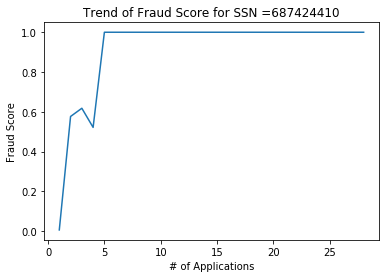

In [214]:
import matplotlib.pyplot as plt
plt.plot(y['cumlAppliCount'], y['PredLabel'])
plt.show
plt.xlabel('# of Applications')
plt.ylabel('Fraud Score')
plt.title('Trend of Fraud Score for SSN =687424410')
plt.savefig('ApplicationCumLSSN.jpeg')

In [210]:
for  i in range(len(y)):
    if (y.loc[i,'date'] == 20161109):
        y.loc[i,'date'] = '09'
    else: 
        y.loc[i,'date'] = '10'
y

,index,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel,cumlAppliCount
0,855775,855776,09,687424410,SATSETAAJ,UMXUUUSE,8049 XMTSU AVE,1735,19040626,7929322483,0,0.006657,1.0
1,856126,856127,09,687424410,SATSETAAJ,UMXUUUSE,4566 EJSEZ RD,95368,19040626,7502810796,1,0.576758,2.0
2,856512,856513,09,687424410,SATSETAAJ,UMXUUUSE,5431 UEM WY,32856,19040626,8001018032,0,0.618012,3.0
3,856555,856556,09,687424410,SATSETAAJ,UMXUUUSE,1718 XRTSX RD,32695,19040626,6026632317,0,0.521850,4.0
4,856986,856987,09,687424410,SATSETAAJ,UMXUUUSE,1571 UMRAM ST,90906,19040626,6523719414,1,1.000000,5.0
5,857313,857314,09,687424410,SATSETAAJ,UMXUUUSE,5556 XSEEZ PL,85953,19040626,7440597514,1,1.000000,6.0
6,857697,857698,09,687424410,SATSETAAJ,UMXUUUSE,6997 SAEAT ST,34168,19040626,1050596603,1,1.000000,7.0
7,857965,857966,10,687424410,SATSETAAJ,UMXUUUSE,1710 ESEEJ WY,90188,19040626,733459284,0,1.000000,8.0
8,858046,858047,10,687424410,SATSETAAJ,UMXUUUSE,893 URTXM CT,8106,19040626,6786130452,1,1.000000,9.0
9,858049,858050,10,687424410,SATSETAAJ,UMXUUUSE,4205 UAAZA LN,93782,19040626,2098576434,1,1.000000,10.0


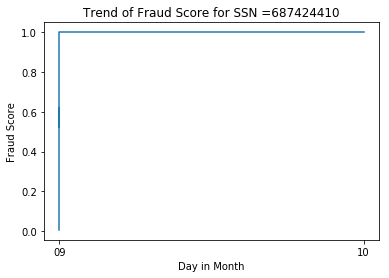

In [215]:
plt.plot(y['date'],y['PredLabel'])
plt.show
plt.xlabel('Day in Month')
plt.ylabel('Fraud Score')
plt.title('Trend of Fraud Score for SSN =687424410')
plt.savefig('DayinMonthSSN.jpeg')

In [227]:
#FinalTable['ssn'].value_counts()[:20]

In [226]:
#FinalTable.groupby('ssn')['PredLabel'].mean().sort_values(ascending = False)

In [245]:
z = FinalTable.loc[FinalTable['homephone'] == 5995186929,:]

In [246]:
z.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel
1864,1865,20160101,438970635,SSSXUEJMS,UXRTRZAJ,4206 EXRTU DR,52863,20020819,5995186929,0,0.006657
11405,11406,20160105,894957945,MUZESZRET,UETJSA,6600 SUUUZ WY,73312,19421210,5995186929,0,0.006657
50278,50279,20160119,189339105,EEEJAUZJM,UZJEUZMT,7615 RTRTR PL,23174,20030615,5995186929,0,0.006657
53005,53006,20160120,783181900,SUEAZJUZU,UXZXMJRS,3213 XAAJJ ST,68846,19920715,5995186929,0,0.006657
71540,71541,20160127,680767990,UXJAUZRMM,UUTSEZJT,7498 RXXSS DR,59290,19520403,5995186929,0,0.006657


In [247]:
z= z.reset_index()

In [248]:
count = 0
for i in range(len(z)):
    count = count + 1
    z.loc[i,'cumlAppliCount'] = count
z

,index,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel,cumlAppliCount
0,1864,1865,20160101,438970635,SSSXUEJMS,UXRTRZAJ,4206 EXRTU DR,52863,20020819,5995186929,0,0.006657,1.0
1,11405,11406,20160105,894957945,MUZESZRET,UETJSA,6600 SUUUZ WY,73312,19421210,5995186929,0,0.006657,2.0
2,50278,50279,20160119,189339105,EEEJAUZJM,UZJEUZMT,7615 RTRTR PL,23174,20030615,5995186929,0,0.006657,3.0
3,53005,53006,20160120,783181900,SUEAZJUZU,UXZXMJRS,3213 XAAJJ ST,68846,19920715,5995186929,0,0.006657,4.0
4,71540,71541,20160127,680767990,UXJAUZRMM,UUTSEZJT,7498 RXXSS DR,59290,19520403,5995186929,0,0.006657,5.0
5,71869,71870,20160127,327662323,TXEMXZZM,EUXRMR,9909 SASTU BLVD,7888,19640318,5995186929,1,0.010921,6.0
6,105619,105620,20160208,83257005,EAXRRUMUX,ERAMJSMR,2680 EJEXS WY,7030,19660512,5995186929,0,0.006657,7.0
7,112567,112568,20160210,329685212,UREZXUTX,EJEUAAXA,4263 RTURE ST,7794,19371214,5995186929,0,0.006657,8.0
8,123349,123350,20160214,990980449,UZSRTZMRZ,EMJXJZRJ,9439 UXUUS PL,44307,19080615,5995186929,0,0.006657,9.0
9,128213,128214,20160216,304578224,RMXUXSSZA,UXSRMXSS,9982 XZERS AVE,28774,19210728,5995186929,0,0.006657,10.0


In [250]:
z.loc[z['date'] >= 20161101,:]

,index,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel,cumlAppliCount
41,853033,853034,20161108,422398042,EXSEEJZEX,SAUMASRS,3252 RTUAE BLVD,80631,853034,5995186929,0,0.006657,42.0
42,855923,855924,20161109,210017234,SJETUJAAZ,RSRTZZRA,4887 XMSMA ST,29536,855924,5995186929,0,0.006657,43.0
43,869401,869402,20161114,432440803,XZXMUZXSM,ERXEZEMM,2427 AEAA CT,12422,19800516,5995186929,0,0.006657,44.0
44,877340,877341,20161117,783181900,SUEAZJUZU,UXZXMJRS,3213 XAAJJ ST,68846,19920715,5995186929,0,0.006657,45.0
45,884708,884709,20161119,700444165,XJZEMAXUU,STJRXXMR,6770 XUXSS ST,50231,19930727,5995186929,0,0.006657,46.0
46,912680,912681,20161130,863268134,EAXRRUMUX,RTJSXAZU,3253 EMMZX LN,38212,19440105,5995186929,0,0.006657,47.0
47,913342,913343,20161130,25196519,EATUESXZX,UXZXXTA,3253 EMMZX LN,38212,19060430,5995186929,1,0.696821,48.0
48,913488,913489,20161130,997743401,XMSAXZTUX,SJURETUX,3253 EMMZX LN,38212,20070308,5995186929,1,0.876221,49.0
49,913707,913708,20161130,446452264,SMSUMXSSJ,UEJMATSM,3253 EMMZX LN,38212,20010418,5995186929,1,0.596917,50.0
50,913785,913786,20161130,567744514,XXTSEUTJT,EMMAUUUR,3253 EMMZX LN,38212,20070110,5995186929,1,1.000000,51.0


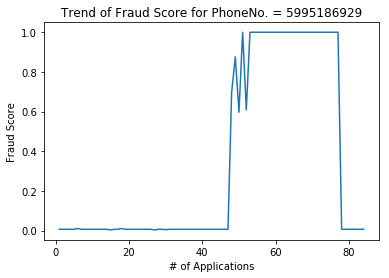

In [240]:
plt.plot(z['cumlAppliCount'], z['PredLabel'])
plt.show
plt.xlabel('# of Applications')
plt.ylabel('Fraud Score')
plt.title('Trend of Fraud Score for PhoneNo. = 5995186929')
plt.savefig('ApplicationCumLPhone.jpeg')

In [251]:
for  i in range(len(z)):
    if (z.loc[i,'date'] <= 20160131):
        z.loc[i,'date'] = 'Jan'
    elif (z.loc[i,'date'] <= 20160231):
        z.loc[i,'date'] = 'Feb'
    elif (z.loc[i,'date'] <= 20160331):
        z.loc[i,'date'] = 'Mar'
    elif (z.loc[i,'date'] <= 20160431):
        z.loc[i,'date'] = 'Apr'
    elif (z.loc[i,'date'] <= 20160531):
        z.loc[i,'date'] = 'May'
    elif (z.loc[i,'date'] <= 20160631):
        z.loc[i,'date'] = 'Jun'
    elif (z.loc[i,'date'] <= 20160731):
        z.loc[i,'date'] = 'Jul'
    elif (z.loc[i,'date'] <= 20160831):
        z.loc[i,'date'] = 'Aug'
    elif (z.loc[i,'date'] <= 20160931):
        z.loc[i,'date'] = 'Sep'
    elif (z.loc[i,'date'] <= 20161031):
        z.loc[i,'date'] = 'Oct'
    elif (z.loc[i,'date'] <= 20161131):
        z.loc[i,'date'] = 'Nov'
    elif (z.loc[i,'date'] <= 20161231):
        z.loc[i,'date'] = 'Dec'     
z

,index,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel,cumlAppliCount
0,1864,1865,Jan,438970635,SSSXUEJMS,UXRTRZAJ,4206 EXRTU DR,52863,20020819,5995186929,0,0.006657,1.0
1,11405,11406,Jan,894957945,MUZESZRET,UETJSA,6600 SUUUZ WY,73312,19421210,5995186929,0,0.006657,2.0
2,50278,50279,Jan,189339105,EEEJAUZJM,UZJEUZMT,7615 RTRTR PL,23174,20030615,5995186929,0,0.006657,3.0
3,53005,53006,Jan,783181900,SUEAZJUZU,UXZXMJRS,3213 XAAJJ ST,68846,19920715,5995186929,0,0.006657,4.0
4,71540,71541,Jan,680767990,UXJAUZRMM,UUTSEZJT,7498 RXXSS DR,59290,19520403,5995186929,0,0.006657,5.0
5,71869,71870,Jan,327662323,TXEMXZZM,EUXRMR,9909 SASTU BLVD,7888,19640318,5995186929,1,0.010921,6.0
6,105619,105620,Feb,83257005,EAXRRUMUX,ERAMJSMR,2680 EJEXS WY,7030,19660512,5995186929,0,0.006657,7.0
7,112567,112568,Feb,329685212,UREZXUTX,EJEUAAXA,4263 RTURE ST,7794,19371214,5995186929,0,0.006657,8.0
8,123349,123350,Feb,990980449,UZSRTZMRZ,EMJXJZRJ,9439 UXUUS PL,44307,19080615,5995186929,0,0.006657,9.0
9,128213,128214,Feb,304578224,RMXUXSSZA,UXSRMXSS,9982 XZERS AVE,28774,19210728,5995186929,0,0.006657,10.0


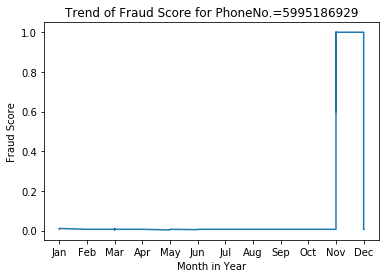

In [252]:
plt.plot(z['date'],z['PredLabel'])
plt.show
plt.xlabel('Month in Year')
plt.ylabel('Fraud Score')
plt.title('Trend of Fraud Score for PhoneNo.=5995186929')
plt.savefig('DayinMonthPhone.jpeg')

In [244]:
z.loc[z['date'] == 'Dec',:]

,index,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,FraudLabel,PredLabel,cumlAppliCount
56,915152,915153,Dec,410314604,USSZMRERM,RTZRRTEX,3253 EMMZX LN,38212,19180301,5995186929,1,1.000000,57.0
57,915263,915264,Dec,362746897,UXUERTXEZ,UMUMAEZM,3253 EMMZX LN,38212,19540927,5995186929,1,1.000000,58.0
58,915422,915423,Dec,523658922,UXAJUAAAT,AXUJZEE,3253 EMMZX LN,38212,19700707,5995186929,1,1.000000,59.0
59,915662,915663,Dec,37078086,UXJAUZRMM,RXSJAUUZ,3253 EMMZX LN,38212,19970329,5995186929,1,1.000000,60.0
60,915822,915823,Dec,943279530,USSXAAEUZ,USJXUZAZ,3253 EMMZX LN,38212,19411216,5995186929,1,1.000000,61.0
61,915971,915972,Dec,307422030,USSTAEZXS,STUSMAAU,3253 EMMZX LN,38212,19880624,5995186929,1,1.000000,62.0
62,916030,916031,Dec,110182956,EMAZEXZAR,RTRSRTRM,3253 EMMZX LN,38212,19750828,5995186929,1,1.000000,63.0
63,916219,916220,Dec,199127491,RUUUXXJXS,RSXUAAUA,3253 EMMZX LN,38212,19480904,5995186929,1,1.000000,64.0
64,916252,916253,Dec,266536098,RMXJSZJRR,SXAZRXJM,3253 EMMZX LN,38212,19310317,5995186929,1,1.000000,65.0
65,916307,916308,Dec,416569515,SMRAUMMMZ,UEUEXUTE,3253 EMMZX LN,38212,19300713,5995186929,1,1.000000,66.0
